# Question 3.  Classification using a neural network

In this assignment,you will be working with a dataset that has been split into training data and test data, do not modify these. Your task will be to design and apply a neural net for classification of these data.  We highly recommend you do not define the neural net from the ground up, instead use TensorFlow.  You will also be expected to justify your strategy for the analysis.

You should submit your assignment as a fully commented code with all plots included. It should be clear where any plots produced originate. You should provide an interpretation of your results throughout. The ideal format is .ipynb and the accompanying .html file including plots and comments. Other formats are acceptable as long as code can be copied and tested for accuracy, but the presentation of the results is important.


In [27]:
#load the libraries

%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split


## 1. Load the data and clearly describe the dataset. [6 marks]

Load the four data files ['xTrain.csv','xTest.csv','yTrain.csv','yTest.csv'].

Explore the data by printing or plotting and answer using your own words.

### 1.1 How many samples and features are there in each dataset?  What is the data split?

### 1.2 What is the proportion of each class in the training and test sets?


In [28]:
# same imports and data preprocessing as before:

%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn import datasets

x_train = pd.read_csv('xTrain.csv')
x_test  = pd.read_csv('xTest.csv')
y_train = pd.read_csv('yTrain.csv')
y_test  = pd.read_csv('yTest.csv')

n_samp_x_train = len(x_train)
n_samp_x_test = len(x_test)
n_samp_y_train = len(y_train)
n_samp_y_test = len(y_test)

print("the number of samples in x_train is :", n_samp_x_train)
print("the number of samples in x_test is :", n_samp_x_test)
print("the number of samples in y_train is :", n_samp_y_train)

#now we will count the number of features in each
#lets display the x datasets 

#x_train
#x_test

#looking at the x train and x test 
#the columns are the features and the rows are the samples

num_features_x_train = x_train.shape[1]
print(f"Number of features in X_train: {num_features_x_train}")

num_features_x_test = x_test.shape[1]
print(f"Number of features in X_test: {num_features_x_test}")

#now we can define the features in the y test and train
#y_train
#y_test

#the features are the classes in the data

num_features_y_train = len(y_train['Class'].unique())
print(f"Number of features in y_train : {num_features_y_train}")

#since there are different classes for each sample number
#we can count the samples per class

print(y_train['Class'].value_counts(ascending=True))

#the features are the classes in the data for y test
#we can copy the same code for that

num_features_y_test = len(y_test['Class'].unique())
print(f"Number of features in y test : {num_features_y_test}")

print(y_test['Class'].value_counts(ascending=True))


the number of samples in x_train is : 700
the number of samples in x_test is : 300
the number of samples in y_train is : 700
Number of features in X_train: 20
Number of features in X_test: 20
Number of features in y_train : 5
Class
3    137
4    139
0    140
2    141
1    143
Name: count, dtype: int64
Number of features in y test : 5
Class
3    59
4    60
2    60
0    60
1    61
Name: count, dtype: int64


## 2. Prepare the data. [4 marks]

### 2.1  One-hot encode the output labels (y).

We recommend using the OneHotEncoder from scikit-learn's preprocessing module.

### 2.2 Standardise the feature matrices (x).


In [29]:
from sklearn.preprocessing import OneHotEncoder

#lets figure out what type of data is the y train and y test
print("Type of y_train:", type(y_train))
print("Type of y_test:", type(y_test))

print("Shape of original y_train:", y_train.shape)
print("First few values of original y_train:\n", y_train[:5])
print("Shape of original y_test:", y_test.shape)
print("First few values of original y_test:\n", y_test[:5])
print("-" * 30)


encoder = OneHotEncoder(sparse_output=False)

#then we have to fit the encoder for the trianing labels

encoder.fit(y_train.values.reshape(-1, 1))
encoder.fit(y_test.values.reshape(-1,1))


#transform the training and test labels
y_train_encoded = encoder.transform(y_train.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

#y_train encoded and y_test encoded are one-hot encoded arrays

# Print shapes and a few values of the encoded labels
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("First few rows of y_train_encoded:\n", y_train_encoded[:5])
print("Shape of y_test_encoded:", y_test_encoded.shape)
print("First few rows of y_test_encoded:\n", y_test_encoded[:5])
print("-" * 30)

print("\nExample of original y_train (first 5 elements):")
print(y_train[:5])
print("\nExample of one-hot encoded y_train (first 5 elements):")
print(y_train_encoded[:5])

print("\nExample of original y_test (first 5 elements):")
print(y_test[:5])
print("\nExample of one-hot encoded y_test (first 5 elements):")
print(y_test_encoded[:5])

# additionally we standardise x to have zero mean and unit variance:

from sklearn.preprocessing import StandardScaler

#first initialize the standard scaler
scaler=StandardScaler()

#then fit the scaler on the training data (x_train)
#calculating the mean and std dev of each feature in x_train
scaler.fit(x_train)

#transform the training and test data using the initialized scaler
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

#x_train_scaled and x_test_scaled contain the standardized data

#finally verify the mean and standard deviation (this should be close to 0 and 1)
print("Mean of the first feature in scaled X_train:", np.mean(x_train_scaled[:, 0]))
print("Standard deviation of the first feature in scaled X_train:", np.std(x_train_scaled[:, 0]))

print("\nMean of the first feature in scaled X_test:", np.mean(x_test_scaled[:, 0]))
print("Standard deviation of the first feature in scaled X_test:", np.std(x_test_scaled[:, 0]))

#lets test the shapes and visualize the y dtasets
#i was having an error on the model training
#Shapes (None, 1) and (None, 5) are incompatible" error

# print("Shape of y_train_encoded:", y_train_encoded.shape)
# print("Shape of y_test_encoded:", y_test_encoded.shape)
# print("First few rows of y_train_encoded:\n", y_train_encoded[:5])
# print("First few rows of y_test_encoded:\n", y_test_encoded[:5])

# #both y sets show a second dimension of 5
# #lets double check the unique features of y

# print("Unique classes in y_train:", np.unique(y_train))
# print("Unique classes in y_test:", np.unique(y_test))

# #these look correct, now lets verify the datatypes
# print("Data type of y_train_encoded:", y_train_encoded.dtype)
# print("Data type of y_test_encoded:", y_test_encoded.dtype)

# #these are float 64 which is correct as a float
# #now lets verify the shapes of the input features
# print("Shape of x_train:", x_train.shape)
# print("Shape of x_test_scaled:", x_test_scaled.shape)

Type of y_train: <class 'pandas.core.frame.DataFrame'>
Type of y_test: <class 'pandas.core.frame.DataFrame'>
Shape of original y_train: (700, 1)
First few values of original y_train:
    Class
0      3
1      4
2      4
3      1
4      3
Shape of original y_test: (300, 1)
First few values of original y_test:
    Class
0      4
1      2
2      3
3      3
4      1
------------------------------
Shape of y_train_encoded: (700, 5)
First few rows of y_train_encoded:
 [[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]
Shape of y_test_encoded: (300, 5)
First few rows of y_test_encoded:
 [[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]]
------------------------------

Example of original y_train (first 5 elements):
   Class
0      3
1      4
2      4
3      1
4      3

Example of one-hot encoded y_train (first 5 elements):
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]



## 3. Create a neural network [4 marks]

### 3.1. Finish the design for the neural network.


In [67]:
import tensorflow as tf
from tensorflow.keras import models, layers, losses, optimizers, metrics, regularizers

model = models.Sequential()
regularizer = regularizers.L2(0.01)
neurons_per_layer = [10, 30, 10]
for num_neurons in neurons_per_layer:
    model.add(layers.Dense(num_neurons,
                            activation='relu',
                            kernel_regularizer=regularizer))
model.add(layers.Dense(5, activation='softmax'))
model.build(input_shape=(None, 20,))
print(model.summary())
print("-" * 30)

xe_loss = losses.CategoricalCrossentropy(label_smoothing=0.2)
adam_optim = optimizers.Adam(learning_rate=0.007)
model.compile(optimizer=adam_optim, loss=xe_loss, metrics=[metrics.CategoricalAccuracy()])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 10)                210       
                                                                 
 dense_41 (Dense)            (None, 30)                330       
                                                                 
 dense_42 (Dense)            (None, 10)                310       
                                                                 
 dense_43 (Dense)            (None, 5)                 55        
                                                                 
Total params: 905
Trainable params: 905
Non-trainable params: 0
_________________________________________________________________
None
------------------------------


## 4. Supervised learning using the neural network [8 marks]

### 4.1. Train your neural network with the training data and apply it to the test set.

### 4.2. What is your performance metric such as Accuracy, Loss?  Explain.

### 4.3. Achieve a final accuracy of above 80% and loss under 1.1 on the training set.

### 4.4 How can you improve the accuracy of your model?


In [43]:
#lets train the model 
#I am aiming for ideally a higher accuracy 20-30% 
#above half so 70-80% with minimal loss of less than 1%

#loss is how well the model predicted labels match
#the true labels

#loss is defined in this instance by
#categorical cross entropy: 
#for a multiple class classifier problem including
#one-hot encoded labels, this quantifies the difference
#of the true probability distribution of the labels and
#the probability distribution predicted by the model

#so the lower the categorical cross entropy value
#means that the models prediction(s) are close to 
#the true labels or classes

#accuracy measures the percent of the samples
#correctly assigned by the model
#this is defined in this instance by
#categorical accuracy:
#since the model outputs a probability distribution
#over the classes from the softmax activation fxn
#the predicted class is the one with the highest probability
#so categorical accuracy compares this predicted
#class to the actual class (one-hot), then 
#reports the fraction or percentage of times they match
#a better accuracy = better performance


#one of the ways to improve accuracy
#is to increase the number of epochs
#in the first instance I doubled the number of epochs
#and viewed the results each time
#the number of epochs to have above 80%
#accuracy and lower than 1.1% loss was 160

#we can adjust the learning rate to increase the accuracy
#the final learning rate was 0.007 with epochs=80

#adding more hidden layers,increasing the number of neurons
#per layer, and different activation functions may 
#increase accuracy

#to improve accuracy
#we can implement different regularization techniques
#these can include dropout and batch normalization

#lastly we can do feature engineering
#possibly creating new features from present ones
#or transforming them to better represent any
#underlying patterns which can improve the models 
#performance. This is all dependent on the pattern
#of the mystery data (we do not know the origin
#or relation of the data it could be gene expression)

log = model.fit(x_train, y_train_encoded,
                    batch_size=30,
                    validation_data=(x_test_scaled, y_test_encoded), # ENSURE THIS IS y_test_encoded
                    epochs=80,
                    verbose=True)

print('loss: ', log.history['loss'][-1])
print('accuracy: ', log.history['categorical_accuracy'][-1])

Epoch 1/80
24/24 [==============================] - 1s 7ms/step - loss: 2.9850 - categorical_accuracy: 0.4100 - val_loss: 2.4065 - val_categorical_accuracy: 0.4833
Epoch 2/80
24/24 [==============================] - 0s 2ms/step - loss: 1.9957 - categorical_accuracy: 0.5686 - val_loss: 1.9474 - val_categorical_accuracy: 0.4967
Epoch 3/80
24/24 [==============================] - 0s 2ms/step - loss: 1.6240 - categorical_accuracy: 0.6500 - val_loss: 1.7599 - val_categorical_accuracy: 0.5133
Epoch 4/80
24/24 [==============================] - 0s 2ms/step - loss: 1.4635 - categorical_accuracy: 0.7214 - val_loss: 1.6933 - val_categorical_accuracy: 0.5267
Epoch 5/80
24/24 [==============================] - 0s 2ms/step - loss: 1.3872 - categorical_accuracy: 0.7257 - val_loss: 1.6235 - val_categorical_accuracy: 0.5200
Epoch 6/80
24/24 [==============================] - 0s 2ms/step - loss: 1.3232 - categorical_accuracy: 0.7514 - val_loss: 1.5696 - val_categorical_accuracy: 0.6100
Epoch 7/80
24/24

## 5. Diagnostic plots [4 marks]

### 5.1. Visualize the net accuracy across epochs.


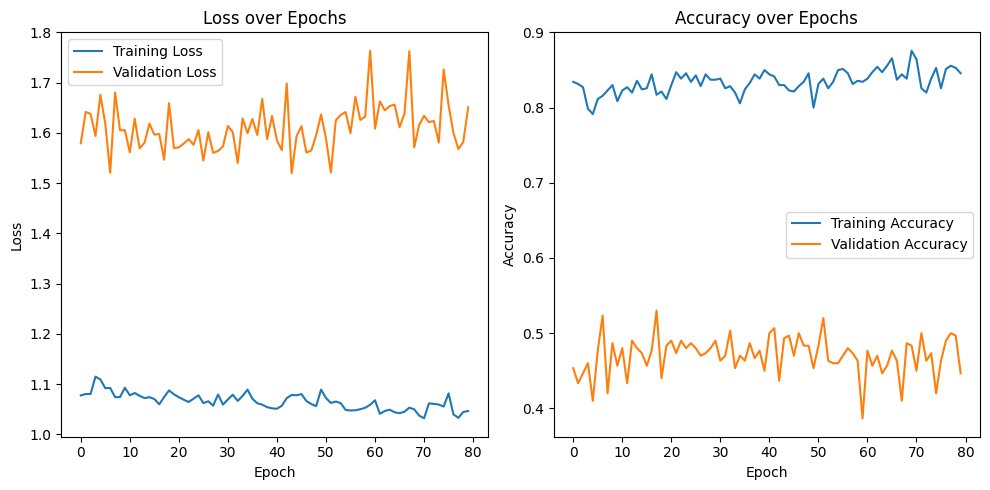

In [46]:


#lets plot the training loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(log.history['loss'], label='Training Loss')
plt.plot(log.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# next plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(log.history['categorical_accuracy'], label='Training Accuracy')
plt.plot(log.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#for the loss and accuracy over epochs
#the graph patterns make it difficult
#to determine a certain trend however
#it looks like as the number of epochs increased
#the loss decreased slowly, 
#the accuracy however did not have a definitive pattern

## 6. The effect of the learning rate. [10 marks]

Investigate the effect of the learning rate.

### 6.1. Vary the learning rate (using a loop), and save the accuracy for both training and test sets.

### 6.2. Visualize the accuracy across epochs for the different learning rates.

### 6.3. What do you notice?  Is there an optimal learning rate?


Epoch 1/80
24/24 [==============================] - 0s 3ms/step - loss: 0.9931 - categorical_accuracy: 0.8729 - val_loss: 1.4578 - val_categorical_accuracy: 0.5233
Epoch 2/80
24/24 [==============================] - 0s 2ms/step - loss: 1.0233 - categorical_accuracy: 0.8514 - val_loss: 1.5388 - val_categorical_accuracy: 0.4833
Epoch 3/80
24/24 [==============================] - 0s 2ms/step - loss: 0.9839 - categorical_accuracy: 0.8829 - val_loss: 1.5928 - val_categorical_accuracy: 0.4633
Epoch 4/80
24/24 [==============================] - 0s 2ms/step - loss: 0.9741 - categorical_accuracy: 0.8900 - val_loss: 1.5165 - val_categorical_accuracy: 0.5100
Epoch 5/80
24/24 [==============================] - 0s 2ms/step - loss: 0.9708 - categorical_accuracy: 0.8843 - val_loss: 1.5491 - val_categorical_accuracy: 0.4633
Epoch 6/80
24/24 [==============================] - 0s 2ms/step - loss: 0.9702 - categorical_accuracy: 0.8929 - val_loss: 1.5334 - val_categorical_accuracy: 0.4933
Epoch 7/80
24/24

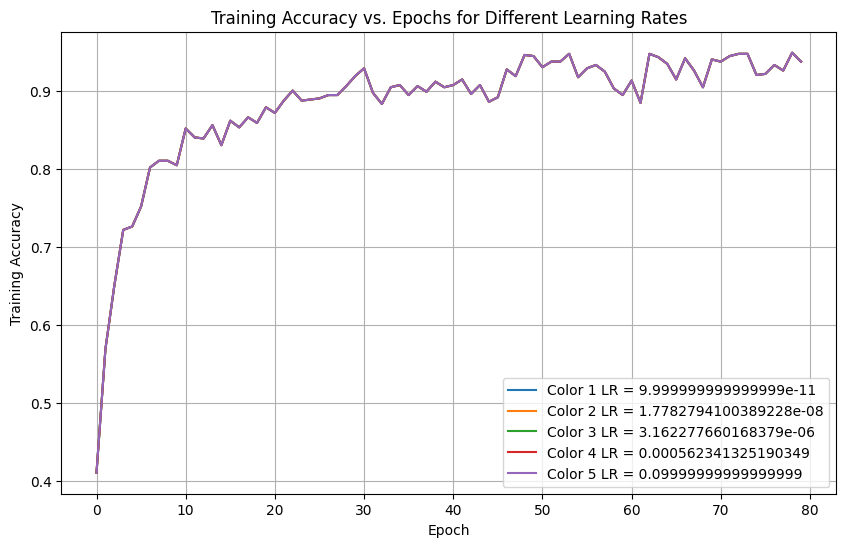

In [73]:
#lets explore learning rates with a wider range
learning_rates_exploration = np.logspace(-10, -1, num=5)  

#create a dictionary to store the training history
training_history = {}
for l in range(len(learning_rates_exploration)): 
    
    adam_optim = optimizers.Adam(learning_rate=learning_rates_exploration[l])
    
    log_lr = model.fit(x_train, y_train_encoded,
                    batch_size=30,
                    validation_data=(x_test_scaled, y_test_encoded), 
                    epochs=80,
                    verbose=True)
    
    #lets store the history learning rates 
    training_history[l] = log.history
        
#visualize log here as a group or individually


# Create a list of formatted labels
legend_labels = [f'Color {i+1} LR = {lr}' for i, lr in enumerate(learning_rates_exploration)]

plt.figure(figsize=(10, 6))

for i, (learning_rate, history) in enumerate(training_history.items()):
    plt.plot(history['categorical_accuracy'], label=legend_labels[i])  # Use the formatted label

plt.title('Training Accuracy vs. Epochs for Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#I am not sure why the learning rate pattern 
#is the same throughout the different learning rates
#as the epochs increases so does the accuracy
#I tried increasing the range of learning rates
#multiple times and the pattern is the same regardless

## 7. Using a validation set. [4 marks]

Create a validation set by splitting the test set further into test and validation sets. What is a validation set used for?  Demonstrate the use of the validation set using your code.  How does the performance of the model on the test set compares to the validation set?  Explain.


In [84]:
#a validation set is a part of the dataset that you 
#withhold from the trainng process
#it evaluates the models performance during training
#which allows us to fine-tune the model and prevent
#overfitting

#the purposes of validation include:
#hyperparameter tuning, the validation helps 
#choose better values for learning rate, epochs, 
#model architecture, and regularization strength

#next we can prevent overfitting using validation

#then we can compare different models through their validation
#to determine the model with the best performance

#for some reason I was getting an error
#ValueError: Data cardinality is ambiguous:
#   x sizes: 37
#   y sizes: 300
# Make sure all arrays contain the same number of samples.
# I think it had to deal with the data split below
#however I apologize as it quite too late 
#for me to fix this mistake and find a solution
#
#lets split the existsing set into a smaller test set and validation set
x_test, x_val, y_test, y_val = train_test_split(
    x_test, y_test, test_size=0.5, random_state=50, stratify=y_test)

#first initialize the standard scaler
scaler=StandardScaler()

#then fit the scaler on the training data (x_train)
#calculating the mean and std dev of each feature in x_train
scaler.fit(x_train)

#transform the training and test data using the initialized scaler
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

#lets explore learning rates with a wider range
learning_rates_exploration = np.logspace(-10, -1, num=5)  

#create a dictionary to store the training history
training_history = {}
for l in range(len(learning_rates_exploration)): 
    
    adam_optim = optimizers.Adam(learning_rate=learning_rates_exploration[l])
    
    log_lr = model.fit(x_train, y_train_encoded,
                    batch_size=30,
                    validation_data=(x_test_scaled, y_test_encoded), 
                    epochs=80,
                    verbose=True)
    
    #lets store the history learning rates 
    training_history[l] = log.history
        
#visualize log here as a group or individually


#create a list of formatted labels
legend_labels = [f'Color {i+1} LR = {lr}' for i, lr in enumerate(learning_rates_exploration)]

plt.figure(figsize=(10, 6))

for i, (learning_rate, history) in enumerate(training_history.items()):
    plt.plot(history['categorical_accuracy'], label=legend_labels[i])  # Use the formatted label

plt.title('Training Accuracy vs. Epochs for Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/80
 1/24 [>.............................] - ETA: 0s - loss: 0.8682 - categorical_accuracy: 0.9667

ValueError: Data cardinality is ambiguous:
  x sizes: 37
  y sizes: 300
Make sure all arrays contain the same number of samples.